### MSSV: 1712024

### Họ tên: Nguyễn Thành Đạt

### Lớp : CQ2017/1 - Phân tích dữ liệu ứng dụng - Vấn đáp cuối kỳ

In [98]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [58]:
df = pd.read_csv('OnlineRetail.csv', encoding='latin')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## **Data Cleansing**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Giải thích các thuộc tính:**
- InvoiceNo: Mã hóa đơn
- StockCode: Mã sản phẩm
- Description: Mô tả sản phẩm
- Quantity: Số lượng sản phẩm của 1 giao dịch
- InvoiceDate: Ngày xuất hóa đơn
- UnitPrice: Đơn giá
- CustomerID: Mã khách hàng
- Country: Quốc gia

In [60]:
# Mục tiêu: Đếm số dòng bị trùng trong tập dữ liệu
# Giải pháp: Xóa tất cả

df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [61]:
df = df.drop_duplicates()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [63]:
# Mục tiêu: Đếm tổng số dòng bị NULL của từng cột trong tập dữ liệu

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [64]:
# Tính tỉ lệ phần trăm dữ liệu bị thiếu ở từng cột

for column in df.columns:
    percent = df[column].isnull().mean()
    print(f'{column}:{round(percent*100,2)}%')

InvoiceNo:0.0%
StockCode:0.0%
Description:0.27%
Quantity:0.0%
InvoiceDate:0.0%
UnitPrice:0.0%
CustomerID:25.16%
Country:0.0%


In [65]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:>

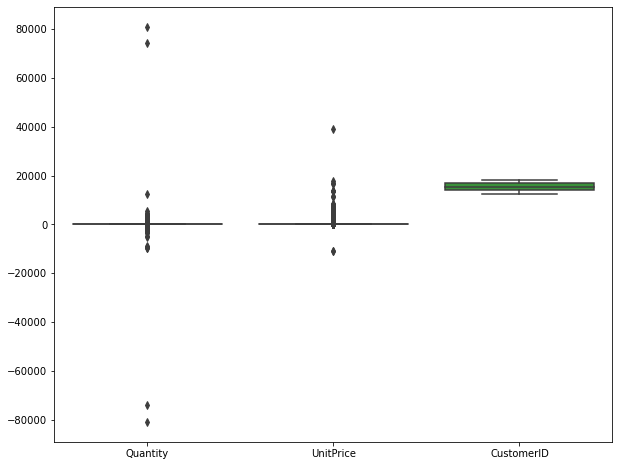

In [66]:
plt.rcParams['figure.figsize'] = [10,8]
b = ['Quantity','UnitPrice','CustomerID']
sns.boxplot(data=df[b])

**ĐÁNH GIÁ:** 
- Có 2 cột có giá trị NULL: Description, CustomerID
- Giá trị của 2 cột Quantity, UnitPrice >= 0. Tuy nhiên, từ các kết quả trên có thể thấy được có những giá trị âm

In [67]:
# Đếm giá trị âm của cột Quantity

df[df['Quantity'] <0].shape[0]

10587

In [70]:
df[df['Quantity'] <0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [75]:
# Đếm giá trị âm của cột UnitPrice

df[df['UnitPrice'] <0].shape[0]

2

In [76]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation,Cancellation
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,0,0
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,0,0


**Lưu ý:** Các giá trị của **InvoiceNo** có chứa kí tự "C" ở đầu chính là những đơn hàng bị hủy hoặc do khách hàng hoàn trả

In [74]:
df['Cancellation']=df.InvoiceNo.str.extract('([C])').fillna(0).replace({'C':1})
df['Cancellation'].value_counts()

0    527390
1      9251
Name: Cancellation, dtype: int64

In [73]:
df[df.cancellation==1]['CustomerID'].nunique() / df['CustomerID'].nunique()*100

36.34492223238792

In [77]:
df = df[df.CustomerID.notnull()]

In [78]:
df = df[(df.Quantity > 0) & (df.UnitPrice > 0)]

In [84]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [85]:
# Tính số lượng hóa đơn dành cho mỗi khách hàng

df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
16823.0      1
16820.0      1
16812.0      1
14420.0      1
12346.0      1
Name: InvoiceNo, Length: 4338, dtype: int64

In [93]:
# Tính tổng doanh thu của mỗi quốc gia

df['TotalPrice'] = df['UnitPrice']*df['Quantity']
df2 = pd.DataFrame(df.groupby('Country').TotalPrice.sum().apply(lambda x: round(x,2))).sort_values('TotalPrice',ascending=False)
df2['perc_of_TotalPrice']=round(df2.TotalPrice/df2.TotalPrice.sum()*100,2)
df2['customer_num']=df.groupby('Country').CustomerID.nunique()
df2['customer_rate']=round(df2.customer_num/df2.customer_num.sum()*100,2)
df2.head(10)

,TotalPrice,perc_of_TotalPrice,customer_num,customer_rate
Country,,,,
United Kingdom,7285024.64,81.97,3920,90.20
Netherlands,285446.34,3.21,9,0.21
EIRE,265262.46,2.98,3,0.07
Germany,228678.40,2.57,94,2.16
France,208934.31,2.35,87,2.00
Australia,138453.81,1.56,9,0.21
Spain,61558.56,0.69,30,0.69
Switzerland,56443.95,0.64,21,0.48
Belgium,41196.34,0.46,25,0.58


**KẾT LUẬN:**
Từ kết quả trên, có thể thấy được: United Kingdom là quốc gia không chỉ có doanh thu bán hàng nhiều nhất mà còn có nhiều khách hàng nhất.
Vì thế, em sẽ phân tích tập trung vào quốc gia này, đồng thời, thực hiện phân cụm khách hàng đối với dữ liệu thuộc nước này

In [95]:
df_uk=df[df.Country=='United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [97]:
# Tìm kiếm các mặt hàng phổ biến ở nước này

pd.DataFrame(df_uk.StockCode.value_counts().head(10))

,StockCode
85123A,1936
85099B,1461
22423,1417
84879,1320
47566,1300
20725,1135
20727,1022
22720,1013
23203,993
22383,977


**Lưu ý:** Các giá trị của **StockCode** có chứa kí tự "A" và kí tự "B" không có ý nghĩa gì

**Giới thiệu về RFM Analysis:** là một kỹ thuật phân khúc khách hàng để phân tích giá trị khách hàng dựa trên hành vi mua hàng trong quá khứ. RFM Analysis lần đầu tiên được sử dụng từ hơn bốn thập kỷ trước, nhưng nó vẫn là một cách hiệu quả để tối ưu hóa hoạt động tiếp thị của các doanh nghiệp ngày nay
- RECENCY (R): Lần mua hàng cuối cùng
- FREQUENCY (F): Tổng số lần/Tần suất mua hàng
- MONETARY VALUE (M): Tổng số tiền đã chi

**RFM Analysis trả lời các câu hỏi sau:**
- Khách hàng đem lại nhiều lợi ích nhất là ai?
- Ai có tiềm năng sẽ là đem lại lợi ích nhiều hơn?
- Cần giữ chân những khách hàng nào?
- Nhóm khách hàng nào có nhiều khả năng sẽ tương tác, quan tâm các chiến dịch tiếp thị nhất?

In [99]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_uk=df[df.Country=='United Kingdom']
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Thực hiện tính toán giá trị **RECENCY (R): Lần mua hàng cuối cùng**
- Chọn một ngày làm điểm tham chiếu để đánh giá lần mua hàng cuối cùng của khách hàng là bao nhiêu ngày
- Tạo một cột mới có tên là Date chứa ngày xuất hóa đơn
- Nhóm CustomerID ứng với ngày mua hàng cuối cùng của họ
- Tính số ngày kể từ lần mua cuối cùng đến thời gian hiện tại

In [124]:
ref_date = max(df['InvoiceDate'])
ref_date

Timestamp('2011-12-09 12:50:00')

In [125]:
df_uk['Date']=df_uk['InvoiceDate'].apply(lambda x: x.date())
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-09
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-09
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-09
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-09


In [149]:
df_uk['Last_Purchase_Date']=df_uk.groupby(['CustomerID'])['Date'].transform(max)
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Recency,Frequency,Last_Purchase_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372 days,34,2010-12-02
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372 days,34,2010-12-02
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372 days,34,2010-12-02
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372 days,34,2010-12-02
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372 days,34,2010-12-02


In [150]:
df_uk['Recency']=df_uk.groupby('CustomerID')['Last_Purchase_Date'].apply(lambda x:ref_date.date() - x)
df_uk['Recency']=df_uk.agg({'Recency':lambda x:x.astype('timedelta64[D]')})
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Recency,Frequency,Last_Purchase_Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,372.0,34,2010-12-02
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0,34,2010-12-02
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,372.0,34,2010-12-02
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0,34,2010-12-02
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,372.0,34,2010-12-02


In [151]:
df_uk.reset_index()
df_uk.Recency.value_counts().sort_index()

0.0      12341
1.0      31709
2.0      18224
3.0      13749
4.0      19841
         ...  
368.0       75
369.0      169
371.0       98
372.0      487
373.0      431
Name: Recency, Length: 302, dtype: int64

Thực hiện tính toán giá trị **FREQUENCY (F): Tổng số lần/Tần suất mua hàng**

In [152]:
df_uk = df_uk.drop('Last_Purchase_Date',axis=1)

In [ ]:
df_uk=df_uk.drop_duplicates()
df_uk['Frequency'] = df_uk.groupby('CustomerID').InvoiceNo.transform('nunique')

Thực hiện tính toán giá trị **MONETARY VALUE (M): Tổng số tiền đã chi**

In [153]:
df_uk['Monetary'] = df_uk.groupby('CustomerID').TotalPrice.transform('sum')

In [155]:
df_rfm = df_uk[['Recency','Frequency','Monetary']].drop_duplicates().rename(index=df_uk['CustomerID'])
df_rfm.sort_index()

,Recency,Frequency,Monetary
12346.0,325.0,1,77183.60
12747.0,2.0,11,4196.01
12748.0,0.0,209,33053.19
12749.0,3.0,5,4090.88
12820.0,3.0,4,942.34
...,...,...,...
18280.0,277.0,1,180.60
18281.0,180.0,1,80.82
18282.0,7.0,2,178.05
18283.0,3.0,16,2045.53


Cách đơn giản nhất để tạo phân cụm khách hàng từ mô hình RFM là sử dụng **IQR**. Qui định mức điểm từ 1 đến 4 cho mỗi danh mục (Lần mua gần đây, Tần suất mua và Số tiền đã chi). Trong đó, điểm 4 là giá trị cao nhất / tốt nhất.

In [156]:
quantiles = df_rfm.quantile(q=[0.25,0.50,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,298.185
0.50,50.0,2.0,644.975
0.75,142.0,5.0,1571.285


Tạo 2 hàm:
- Một hàm dùng để chấm điểm **Recency**. Đối với trường hợp này, khách hàng thuộc phần tư đầu tiên sẽ được chấm điểm cao nhất
- Một hàm dùng để chấm điểm **Frequency, Monetary**. Đối với trường hợp này, khách hàng thuộc phần tư cuối cùng sẽ được chấm điểm cao nhất

In [157]:
def R_Point(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [158]:
def FM_Point(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [159]:
df_rfm['R_Quartile'] = df_rfm['Recency'].apply(R_Point, args=('Recency',quantiles))
df_rfm['F_Quartile'] = df_rfm['Frequency'].apply(FM_Point, args=('Frequency',quantiles))
df_rfm['M_Quartile'] = df_rfm['Monetary'].apply(FM_Point, args=('Monetary',quantiles))

In [160]:
df_rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
17850.0,372.0,34,5391.21,1,4,4
13047.0,31.0,10,3237.54,3,4,4
13748.0,95.0,5,948.25,2,3,3
15100.0,333.0,3,876.00,1,3,3
15291.0,25.0,15,4668.30,3,4,4
...,...,...,...,...,...,...
15471.0,2.0,1,454.48,4,1,2
13436.0,1.0,1,196.89,4,1,1
15520.0,1.0,1,343.50,4,1,2
13298.0,1.0,1,360.00,4,1,2


In [161]:
df_rfm['RFM_Scores'] = df_rfm.R_Quartile.apply(str) + df_rfm.F_Quartile.apply(str) + df_rfm.M_Quartile.apply(str)
df_rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores
17850.0,372.0,34,5391.21,1,4,4,144
13047.0,31.0,10,3237.54,3,4,4,344
13748.0,95.0,5,948.25,2,3,3,233
15100.0,333.0,3,876.00,1,3,3,133
15291.0,25.0,15,4668.30,3,4,4,344
...,...,...,...,...,...,...,...
15471.0,2.0,1,454.48,4,1,2,412
13436.0,1.0,1,196.89,4,1,1,411
15520.0,1.0,1,343.50,4,1,2,412
13298.0,1.0,1,360.00,4,1,2,412


In [170]:
label = list(np.zeros(len(df_rfm)))

for i in range(len(df_rfm)):
    if df_rfm['RFM_Scores'].iloc[i] =='444': label[i] = "1 - Khách hàng VIP"  # 444
    elif df_rfm['RFM_Scores'].iloc[i][1]=='4': label[i] = "2 - Khách hàng thân thiết" #X4X
    elif df_rfm['RFM_Scores'].iloc[i][2]=='4': label[i] = "3 - Khách hàng chi tiêu nhiều" # XX4
    elif df_rfm['RFM_Scores'].iloc[i]=='144' : label[i] = "4 - Khách hàng gần bỏ đi" 
    elif df_rfm['RFM_Scores'].iloc[i] =='111' : label[i] = "5 - Khách hàng đã bỏ đi"       
        
df_rfm['RFM_Scores_Segments'] = label
df_rfm

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
17850.0,372.0,34,5391.21,1,4,4,144,2 - Khách hàng thân thiết
13047.0,31.0,10,3237.54,3,4,4,344,2 - Khách hàng thân thiết
13748.0,95.0,5,948.25,2,3,3,233,0
15100.0,333.0,3,876.00,1,3,3,133,0
15291.0,25.0,15,4668.30,3,4,4,344,2 - Khách hàng thân thiết
...,...,...,...,...,...,...,...,...
15471.0,2.0,1,454.48,4,1,2,412,0
13436.0,1.0,1,196.89,4,1,1,411,0
15520.0,1.0,1,343.50,4,1,2,412,0
13298.0,1.0,1,360.00,4,1,2,412,0


In [173]:
df_rfm.to_excel(r'C:\Users\ngtha\Desktop\Clustering.xlsx', index = False)